In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [10]:

def calculate_volatility(symbol, start_date, end_date):
    # historical data from Yahoo Finance
    stock_data = yf.download(symbol, start=start_date, end=end_date)

    stock_data['Returns'] = stock_data['Adj Close'].pct_change()

    # volatility -> standard deviation 
    volatility = np.std(stock_data['Returns'])

    return volatility


In [11]:
symbol = 'YUM'
start_date = '2010-01-01'
end_date = '2022-12-31'

volatility = calculate_volatility(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


In [21]:
def calculate_bollinger_bands(symbol, start_date, end_date, window=20, num_std=2):
    stock_data = yf.download(symbol, start=start_date, end=end_date)

    stock_data['Returns'] = stock_data['Adj Close'].pct_change()

    #also get volatility
    stock_data['Volatility'] = stock_data['Returns'].rolling(window=window).std()

    # calculate the rolling mean and standard deviation for Bollinger Bands
    stock_data['SMA'] = stock_data['Adj Close'].rolling(window=window).mean()
    stock_data['Upper Band'] = stock_data['SMA'] + (num_std * stock_data['Adj Close'].rolling(window=window).std())
    stock_data['Lower Band'] = stock_data['SMA'] - (num_std * stock_data['Adj Close'].rolling(window=window).std())

    return stock_data[['Adj Close', 'SMA', 'Upper Band', 'Lower Band', 'Volatility']]

#returns a dataframe of things



In [22]:

symbol = 'YUM'
start_date = '2022-01-01'
end_date = '2022-12-31'

bollinger_bands_data = calculate_bollinger_bands(symbol, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


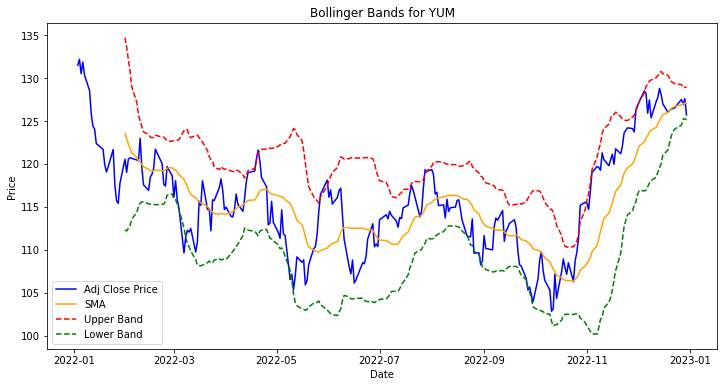

In [23]:
# plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(bollinger_bands_data.index, bollinger_bands_data['Adj Close'], label='Adj Close Price', color='blue')
plt.plot(bollinger_bands_data.index, bollinger_bands_data['SMA'], label='SMA', color='orange')
plt.plot(bollinger_bands_data.index, bollinger_bands_data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(bollinger_bands_data.index, bollinger_bands_data['Lower Band'], label='Lower Band', color='green', linestyle='--')

plt.title(f'Bollinger Bands for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

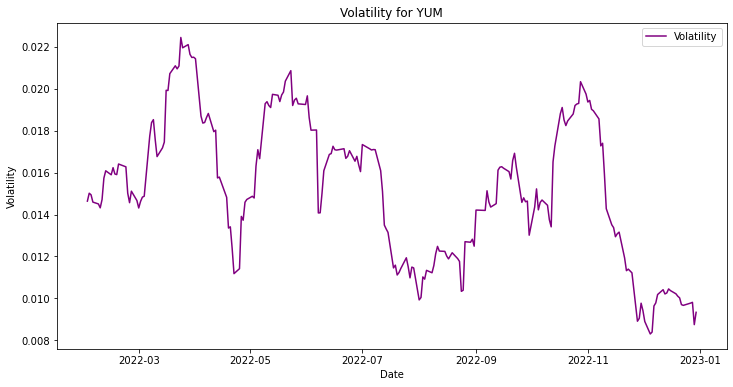

In [24]:
#plotting volatility
plt.figure(figsize=(12, 6))
plt.plot(bollinger_bands_data.index, bollinger_bands_data['Volatility'], label='Volatility', color='purple')

plt.title(f'Volatility for {symbol}')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()